In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# Cargar el dataset
data = pd.read_csv('../data/raw/data.csv')

1. ANÁLISIS EXPLORATORIO DE DATOS

In [64]:
data.head()

,ID,EDAD,TRABAJO,ESTADO_CIVIL,EDUCACION,INCUMPLIMIENTO,VIVIENDA,PRESTAMO,TIPO_CONTACTO,MES,...,NRO_DIAS_CONTACTO,CONTACTOS_PREVIOS,RESULT_PREVIO,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC,ACEPTACION
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,1579.451319,12787.03798,3786.238571,0.0
1,2,57,services,married,high.school,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,1566.451319,31562.70242,4126.821231,0.0
2,3,37,services,married,high.school,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,1380.451319,14158.44577,8044.011661,0.0
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,1515.451319,25337.33537,1990.888552,0.0
4,5,56,services,married,high.school,no,no,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,1395.451319,24669.53116,3589.117251,0.0


In [65]:
# Obtener la cantidad de registros
data.size

907725

In [67]:
data.shape

(43225, 21)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43225 entries, 0 to 43224
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 43225 non-null  int64  
 1   EDAD               43225 non-null  int64  
 2   TRABAJO            43225 non-null  object 
 3   ESTADO_CIVIL       43225 non-null  object 
 4   EDUCACION          43225 non-null  object 
 5   INCUMPLIMIENTO     43225 non-null  object 
 6   VIVIENDA           43225 non-null  object 
 7   PRESTAMO           43225 non-null  object 
 8   TIPO_CONTACTO      43225 non-null  object 
 9   MES                43225 non-null  object 
 10  CAMPANA            43225 non-null  int64  
 11  NRO_DIAS_CONTACTO  43225 non-null  int64  
 12  CONTACTOS_PREVIOS  43225 non-null  int64  
 13  RESULT_PREVIO      43225 non-null  object 
 14  TASA_VAR_EMP       43225 non-null  float64
 15  IPC                43225 non-null  float64
 16  ICC                432

In [69]:
data.describe()

,ID,EDAD,CAMPANA,NRO_DIAS_CONTACTO,CONTACTOS_PREVIOS,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC,ACEPTACION
count,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,43225.000000,31478.000000
mean,20624.291082,40.340312,2.568768,962.357779,0.173117,0.080335,93.575422,-40.506885,3925.815770,19973.792760,4999.155850,0.112269
std,11874.527988,12.464779,2.767127,187.203068,0.495061,1.572550,0.579061,4.631636,3942.566319,8400.976456,2094.484715,0.315702
min,1.000000,5.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,1125.000000,6346.668502,1586.665139,0.000000
25%,10341.000000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1324.856644,12273.100800,3080.213596,0.000000
50%,20609.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,1496.180070,19952.741530,4995.250698,0.000000
75%,30903.000000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,7216.625640,27635.842350,6912.722257,0.000000
max,41188.000000,160.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,16463.000000,33653.594950,8413.229616,1.000000


In [70]:
data.isna().sum()

ID                       0
EDAD                     0
TRABAJO                  0
ESTADO_CIVIL             0
EDUCACION                0
INCUMPLIMIENTO           0
VIVIENDA                 0
PRESTAMO                 0
TIPO_CONTACTO            0
MES                      0
CAMPANA                  0
NRO_DIAS_CONTACTO        0
CONTACTOS_PREVIOS        0
RESULT_PREVIO            0
TASA_VAR_EMP             0
IPC                      0
ICC                      0
INGRESO                  0
MONTO_DEUDA              0
MONTO_TRANSAC            0
ACEPTACION           11747
dtype: int64

2. COMPRENDER LOS DATOS - INVESTIGAR LAS VARIABLES

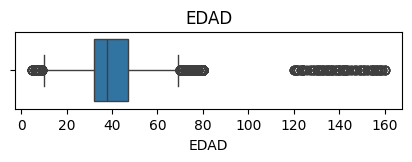

In [76]:
plt.figure(figsize=(5,1))
plt.title('EDAD')
sns.boxplot(x=data['EDAD']);

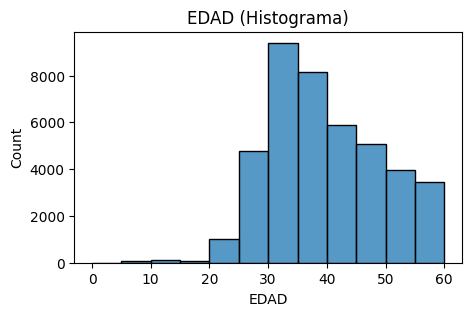

In [87]:
plt.figure(figsize=(5,3))
sns.histplot(data['EDAD'], bins=range(0,61,5))
plt.title('EDAD (Histograma)');

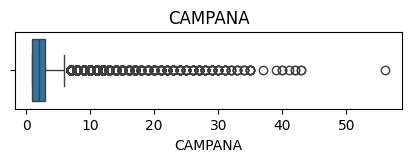

In [77]:
plt.figure(figsize=(5,1))
plt.title('CAMPANA')
sns.boxplot(x=data['CAMPANA']);

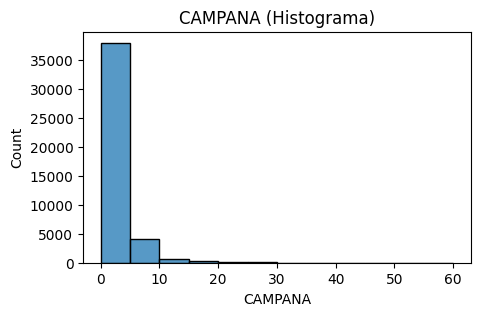

In [88]:
plt.figure(figsize=(5,3))
sns.histplot(data['CAMPANA'], bins=range(0,61,5))
plt.title('CAMPANA (Histograma)');

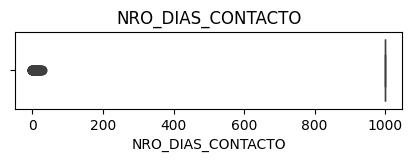

In [78]:
plt.figure(figsize=(5,1))
plt.title('NRO_DIAS_CONTACTO')
sns.boxplot(x=data['NRO_DIAS_CONTACTO']);

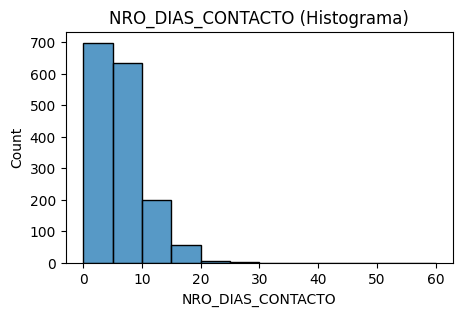

In [89]:
plt.figure(figsize=(5,3))
sns.histplot(data['NRO_DIAS_CONTACTO'], bins=range(0,61,5))
plt.title('NRO_DIAS_CONTACTO (Histograma)');

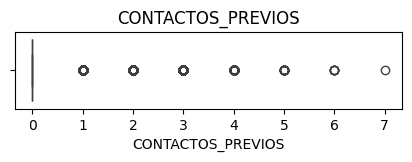

In [79]:
plt.figure(figsize=(5,1))
plt.title('CONTACTOS_PREVIOS')
sns.boxplot(x=data['CONTACTOS_PREVIOS']);

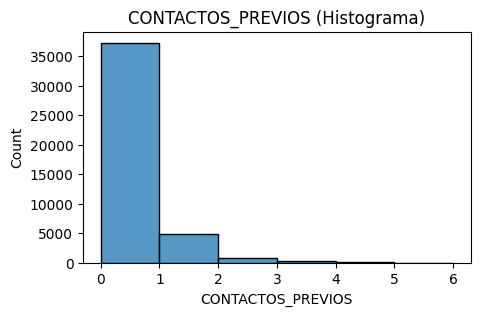

In [104]:
plt.figure(figsize=(5,3))
sns.histplot(data['CONTACTOS_PREVIOS'], bins=range(0,7,1))
plt.title('CONTACTOS_PREVIOS (Histograma)');

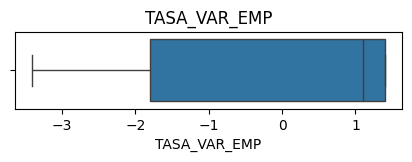

In [80]:
plt.figure(figsize=(5,1))
plt.title('TASA_VAR_EMP')
sns.boxplot(x=data['TASA_VAR_EMP']);

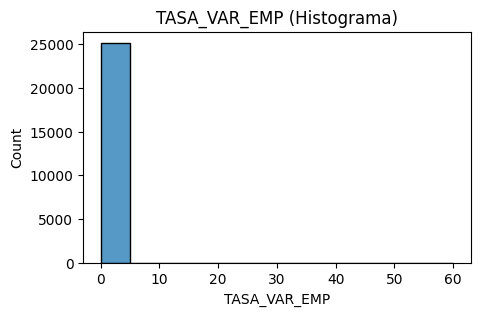

In [91]:
plt.figure(figsize=(5,3))
sns.histplot(data['TASA_VAR_EMP'], bins=range(0,61,5))
plt.title('TASA_VAR_EMP (Histograma)');

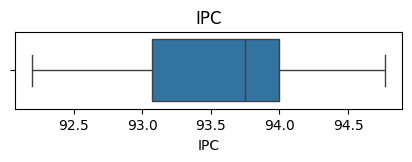

In [81]:
plt.figure(figsize=(5,1))
plt.title('IPC')
sns.boxplot(x=data['IPC']);

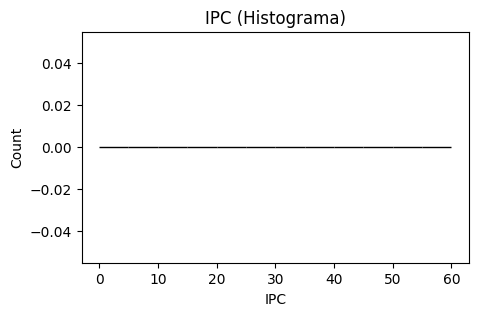

In [94]:
plt.figure(figsize=(5,3))
sns.histplot(data['IPC'], bins=range(0,61,5))
plt.title('IPC (Histograma)');

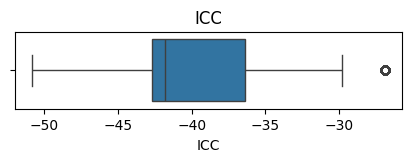

In [82]:
plt.figure(figsize=(5,1))
plt.title('ICC')
sns.boxplot(x=data['ICC']);

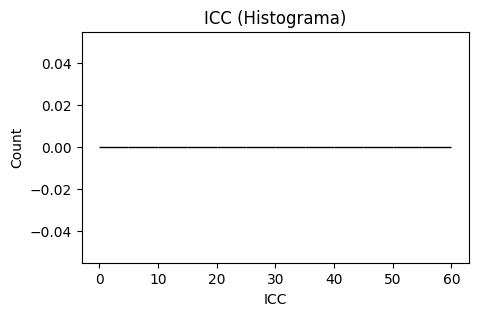

In [95]:
plt.figure(figsize=(5,3))
sns.histplot(data['ICC'], bins=range(0,61,5))
plt.title('ICC (Histograma)');

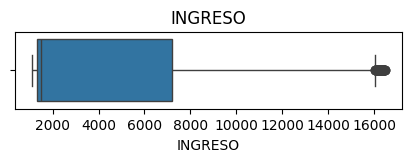

In [83]:
plt.figure(figsize=(5,1))
plt.title('INGRESO')
sns.boxplot(x=data['INGRESO']);

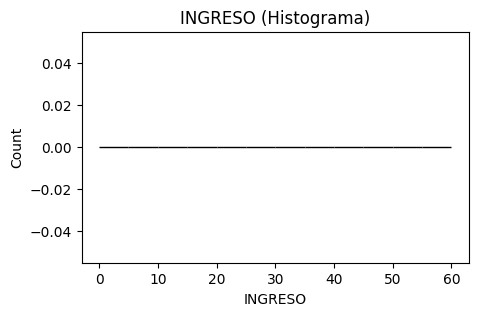

In [97]:
plt.figure(figsize=(5,3))
sns.histplot(data['INGRESO'], bins=range(0,61,5))
plt.title('INGRESO (Histograma)');

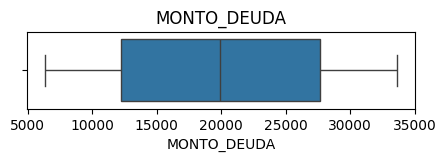

In [84]:
plt.figure(figsize=(5,1))
plt.title('MONTO_DEUDA')
sns.boxplot(x=data['MONTO_DEUDA']);

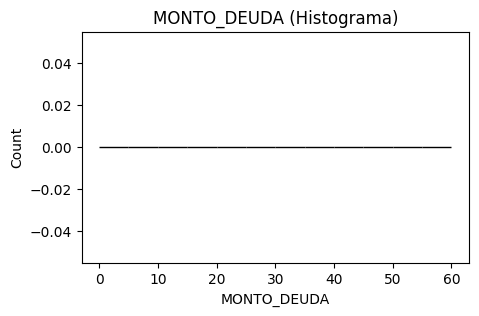

In [98]:
plt.figure(figsize=(5,3))
sns.histplot(data['MONTO_DEUDA'], bins=range(0,61,5))
plt.title('MONTO_DEUDA (Histograma)');

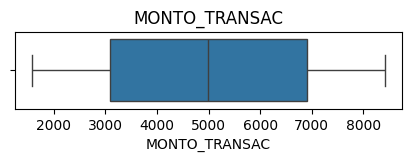

In [85]:
plt.figure(figsize=(5,1))
plt.title('MONTO_TRANSAC')
sns.boxplot(x=data['MONTO_TRANSAC']);

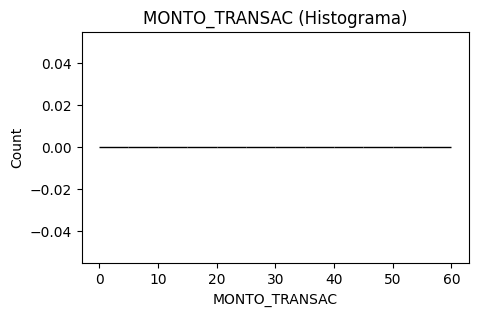

In [99]:
plt.figure(figsize=(5,3))
sns.histplot(data['MONTO_TRANSAC'], bins=range(0,61,5))
plt.title('MONTO_TRANSAC (Histograma)');

In [105]:
count_cols = ['EDAD',
              'CAMPANA',
              'NRO_DIAS_CONTACTO',
              'INGRESO'
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, EDAD: 1141
Number of outliers, CAMPANA: 3574
Number of outliers, NRO_DIAS_CONTACTO: 0
Number of outliers, INGRESO: 4025


In [71]:
# Convertir la variable
data['ACEPTACION'] = data['ACEPTACION'].map({0: 'RECHAZO',1: 'ACEPTACIÓN'})

In [72]:
rechazo = data[data['ACEPTACION'] == 'RECHAZO']
aceptacion = data[data['ACEPTACION'] == 'ACEPTACIÓN']

In [73]:
data['ACEPTACION'].value_counts()

ACEPTACION
RECHAZO       27944
ACEPTACIÓN     3534
Name: count, dtype: int64

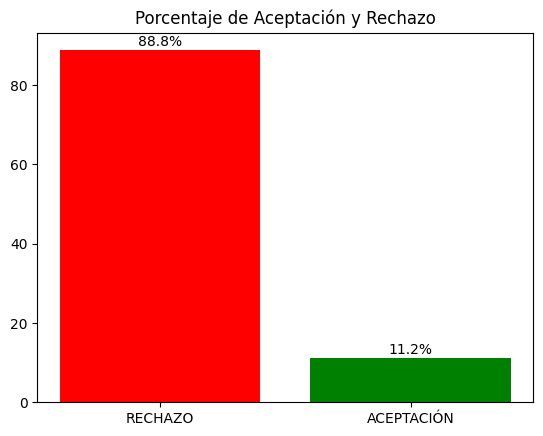

In [61]:
# Calcular los porcentajes
porcentajes = data['ACEPTACION'].value_counts(normalize=True) * 100

# Crear el gráfico de barras
plt.title('Porcentaje de Aceptación y Rechazo')
plt.bar(porcentajes.index, porcentajes.values, color=['red', 'green'])

for index, value in enumerate(porcentajes.values):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center')

plt.show()

In [6]:
data_train = pd.read_csv('../data/processed/data_train.csv')
data_test = pd.read_csv('../data/processed/data_test.csv')